#2023-02-03 Exam: Regression

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = '/content/ml_python_labexam_2023_02_03.csv'
train_size = 0.67
random_state = 42

##1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns (2pt)

In [40]:
df = pd.read_csv(url)
print('DataFrame size: {}\tshape: {}\n'.format(df.size, df.shape))
df.head()

DataFrame size: 11000	shape: (1000, 11)



,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [41]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


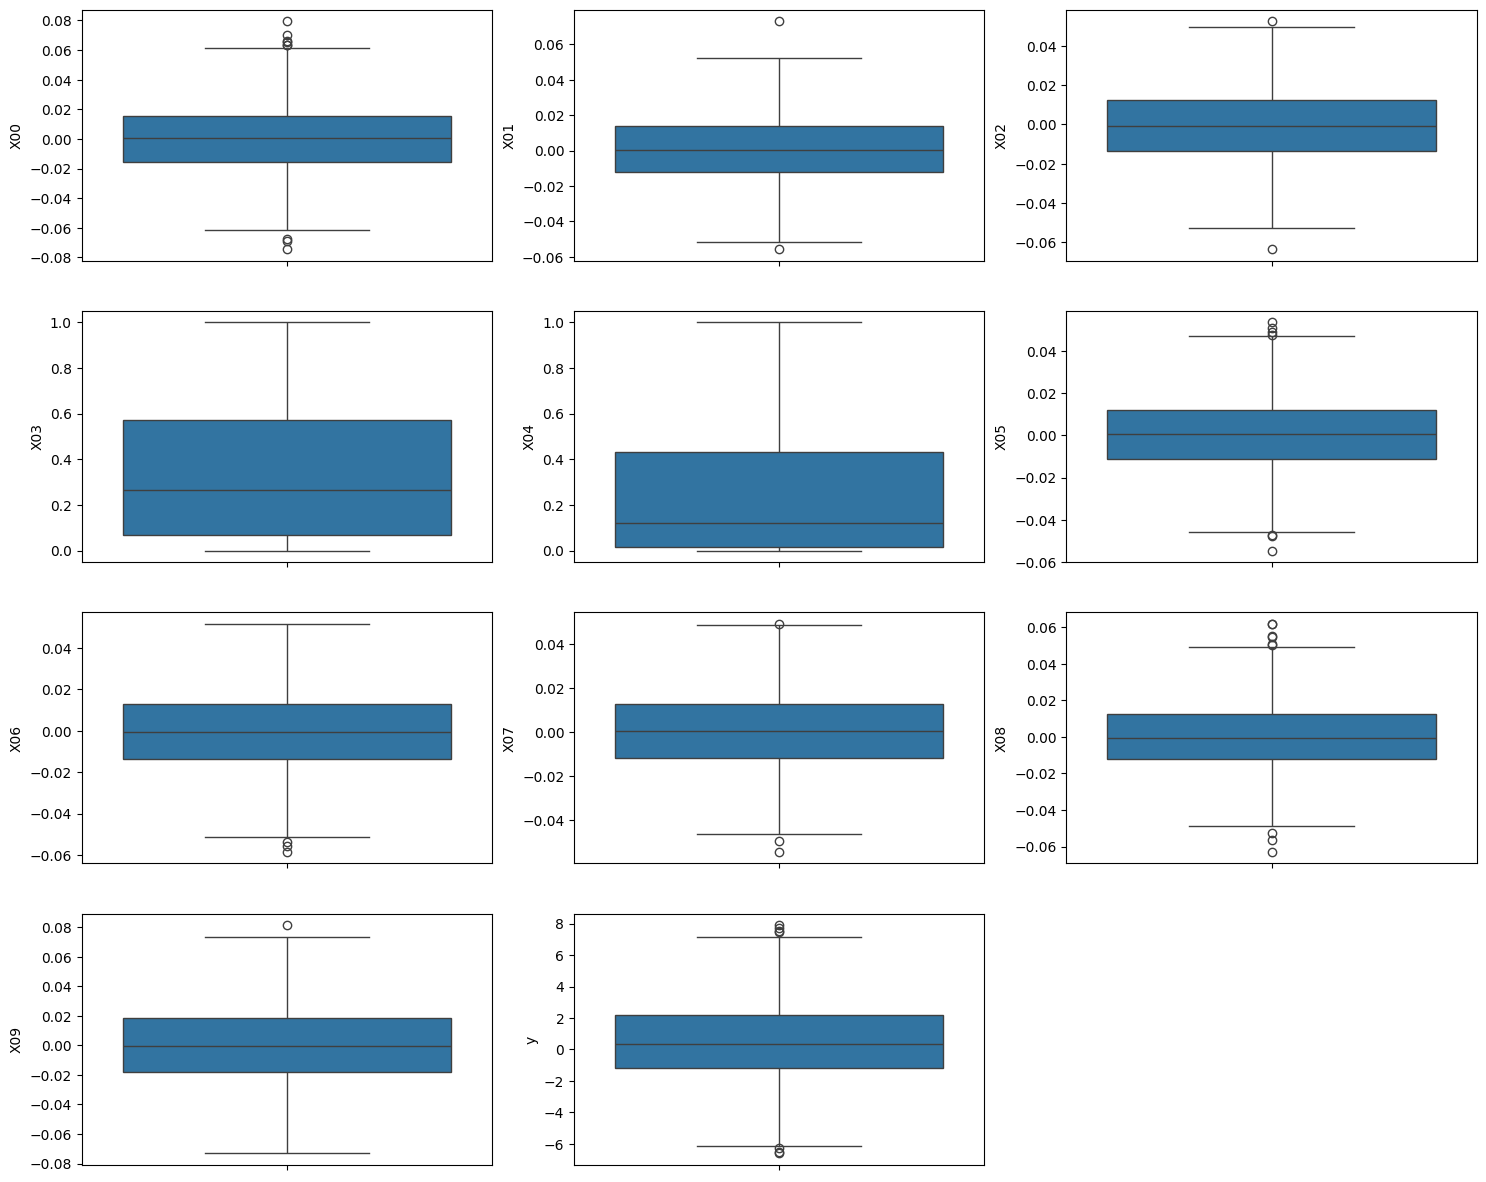

In [42]:
fig = plt.figure(figsize=(18,15))
pos = 1
for i in df.columns:
  if(type(df[i][0]) != str):
    plt.subplot(4,3,pos)
    sns.boxplot(df[i])
    pos+=1

<Axes: >

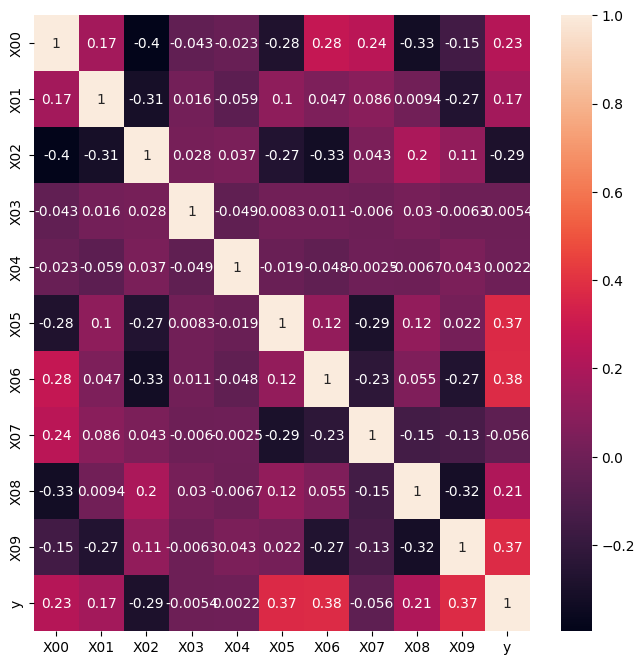

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

##2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15 (2pt)

Distribution of values are similar for all attributes, except for "X03" and "X04", most of the attributes have the median in the center of the distribution.

The dataframe contains only float values. Outliers are present in most of the columns.

Columns "X03", "X04" and "X07" have less than 0.15 absolute value of correlation with the target "y"

##3. train test a multivariate linear regressor and show the Root Mean Squared Error (2pt)

In [44]:
target = 'y'
X = df.drop(target, axis=1).copy()
y = df[target]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

rmse = mean_squared_error(ytest, y_lr, squared=False)
r2 = r2_score(ytest, y_lr)
print('Linear Regression -> RMSE: {:.3f}\tr2: {:.3f}'.format(rmse, r2))

Linear Regression -> RMSE: 0.869	r2: 0.862


##4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error (2pt)

In [46]:
loosely_correlated_vars = ['X03', 'X04', 'X07']
X1 = X.drop(columns=loosely_correlated_vars, axis=1).copy()

Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, random_state=random_state, train_size=train_size)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

rmse = mean_squared_error(ytest, y_lr, squared=False)
r2 = r2_score(ytest, y_lr)

print('Linear Regressor (on reduced dataset) -> RMSE: {:.3f}\tr2: {:.3f}'.format(rmse, r2))

Linear Regressor (on reduced dataset) -> RMSE: 0.984	r2: 0.823


##5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error (2pt)

In [47]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(Xtrain, ytrain)
y_dt = dt.predict(Xtest)

rmse = mean_squared_error(ytest, y_dt, squared=False)
prev_max_depth = dt.tree_.max_depth
print('Decision Tree Regressor -> RMSE: {:.3f}\tmax_depth: {}\tcriterion: {}'.format(rmse, prev_max_depth, dt.criterion))

Decision Tree Regressor -> RMSE: 2.129	max_depth: 18	criterion: squared_error


##6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE (3pt)

In [48]:
from sklearn.model_selection import GridSearchCV

dt_params = [{'max_depth' : list(np.arange(1, prev_max_depth+1)), 'criterion' : ['squared_error'], 'random_state' : [random_state]}]

gs = GridSearchCV(DecisionTreeRegressor(), dt_params, refit=True, scoring='neg_mean_squared_error')
gs.fit(Xtrain, ytrain)
y_dt = gs.predict(Xtest)

rmse = mean_squared_error(ytest, y_dt, squared=False)
print('Decision Tree Regressor (optimized) -> RMSE: {:.3f}\tmax_depth: {}\tcriterion: {}'.format(rmse, gs.best_estimator_.max_depth, gs.scoring))

Decision Tree Regressor (optimized) -> RMSE: 1.946	max_depth: 8	criterion: neg_mean_squared_error


##7. Comment the results (3pt)

All RMSE values obtained are acceptable because they are all lower than the SD of the target "y" (2.407762) obtained with the describe() function.

Decision tree RMSE (1.946) is worse than the Multivariate Linear regressor (0.984)

Cross validation was useful with Decision tree regressor (RMSE decreased from 2.129 to 1.946), also max depth was lowered from 18 to 8.

Cleaning the dataset increased slightly the RMSE on the Multivariate Linear regressor.